In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load data

In [6]:
import os
import shutil

# Paths in Google Drive
drive_coco_base_dir = '/content/drive/MyDrive/coco'
drive_val_images_dir = os.path.join(drive_coco_base_dir, 'images', 'val2017')
drive_val_annotations_file = os.path.join(drive_coco_base_dir, 'annotations', 'instances_val2017.json')

# Local paths
local_coco_base_dir = '/content/coco'
local_val_images_dir = os.path.join(local_coco_base_dir, 'images', 'val2017')
local_val_annotations_dir = os.path.join(local_coco_base_dir, 'annotations')

# Create local directories
os.makedirs(local_val_images_dir, exist_ok=True)
os.makedirs(local_val_annotations_dir, exist_ok=True)

# Copy images
!rsync -ah --progress "{drive_val_images_dir}/" "{local_val_images_dir}/"

# Copy annotations
shutil.copy2(drive_val_annotations_file, local_val_annotations_dir)

Streaming output truncated to the last 5000 lines.
000000289594.jpg
        131.98K 100%    1.13MB/s    0:00:00 (xfr#2501, to-chk=2499/5001)
000000289659.jpg
        355.52K 100%    2.95MB/s    0:00:00 (xfr#2502, to-chk=2498/5001)
000000289702.jpg
        180.57K 100%    1.46MB/s    0:00:00 (xfr#2503, to-chk=2497/5001)
000000289741.jpg
        150.93K 100%    1.19MB/s    0:00:00 (xfr#2504, to-chk=2496/5001)
000000289938.jpg
        236.23K 100%    1.79MB/s    0:00:00 (xfr#2505, to-chk=2495/5001)
000000289960.jpg
        109.71K 100%  837.01kB/s    0:00:00 (xfr#2506, to-chk=2494/5001)
000000289992.jpg
         55.43K 100%  416.42kB/s    0:00:00 (xfr#2507, to-chk=2493/5001)
000000290081.jpg
        163.89K 100%    1.16MB/s    0:00:00 (xfr#2508, to-chk=2492/5001)
000000290163.jpg
        187.32K 100%    1.28MB/s    0:00:00 (xfr#2509, to-chk=2491/5001)
000000290179.jpg
        187.95K 100%    1.25MB/s    0:00:00 (xfr#2510, to-chk=2490/5001)
000000290248.jpg
        171.09K 100%    1.12MB/s

'/content/coco/annotations/instances_val2017.json'

In [7]:
# Paths to the validation images and annotations in local storage
val_images_dir = local_val_images_dir
val_annotations_file = os.path.join(local_val_annotations_dir, 'instances_val2017.json')

In [8]:
import torch
from torchvision import datasets, transforms

In [9]:
# Define any image transformations if needed
transform = transforms.Compose([
    transforms.ToTensor()
])

# Initialize the COCO validation dataset
val_dataset = datasets.CocoDetection(
    root=val_images_dir,
    annFile=val_annotations_file,
    transform=transform
)

# Adjust batch_size and num_workers
batch_size = 64  # Increase if your GPU can handle it
num_workers = 4  # Increase to the number of CPU cores available

# Create a DataLoader for the validation dataset
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    collate_fn=lambda x: tuple(zip(*x))
)

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [10]:
# Get a single batch from the DataLoader
images, targets = next(iter(val_loader))

# Move images to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
images = [image.to(device) for image in images]

# Check the shapes and types
print(f'Number of images in batch: {len(images)}')
print(f'Type of images: {type(images[0])}')
print(f'Image tensor shape: {images[0].shape}')
print(f'Number of targets in batch: {len(targets)}')
print(f'Type of a target: {type(targets[0])}')

Number of images in batch: 64
Type of images: <class 'torch.Tensor'>
Image tensor shape: torch.Size([3, 426, 640])
Number of targets in batch: 64
Type of a target: <class 'list'>


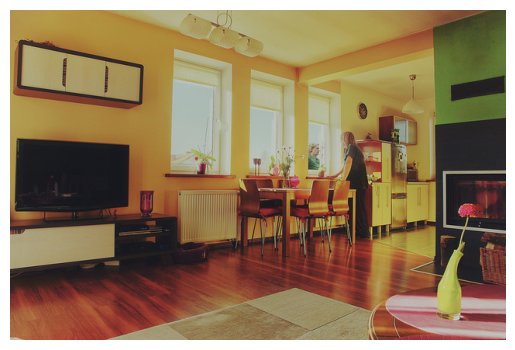

Annotations: [{'segmentation': [[240.86, 211.31, 240.16, 197.19, 236.98, 192.26, 237.34, 187.67, 245.8, 188.02, 243.33, 176.02, 250.39, 186.96, 251.8, 166.85, 255.33, 142.51, 253.21, 190.49, 261.68, 183.08, 258.86, 191.2, 260.98, 206.37, 254.63, 199.66, 252.51, 201.78, 251.8, 212.01]], 'area': 531.8071000000001, 'iscrowd': 0, 'image_id': 139, 'bbox': [236.98, 142.51, 24.7, 69.5], 'category_id': 64, 'id': 26547}, {'segmentation': [[9.66, 167.76, 156.35, 173.04, 153.71, 256.48, 82.56, 262.63, 7.03, 260.87]], 'area': 13244.657700000002, 'iscrowd': 0, 'image_id': 139, 'bbox': [7.03, 167.76, 149.32, 94.87], 'category_id': 72, 'id': 34646}, {'segmentation': [[563.33, 209.19, 637.69, 209.19, 638.56, 287.92, 557.21, 280.04]], 'area': 5833.117949999999, 'iscrowd': 0, 'image_id': 139, 'bbox': [557.21, 209.19, 81.35, 78.73], 'category_id': 72, 'id': 35802}, {'segmentation': [[368.16, 252.94, 383.77, 255.69, 384.69, 235.49, 389.28, 226.31, 392.03, 219.89, 413.15, 218.05, 411.31, 241.92, 411.31, 25

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Move the first image back to CPU for visualization
image = images[0].cpu().permute(1, 2, 0).numpy()

plt.imshow(image)
plt.axis('off')
plt.show()

# Print annotations for the first image
print('Annotations:', targets[0])

In [13]:
from torchvision import models

In [14]:
# Load the pre-trained model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 179MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [15]:
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [16]:
!pip install pycocotools

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

import json
import time
import numpy as np
from tqdm.notebook import tqdm

In [31]:
class COCODatasetWithIDs(datasets.CocoDetection):
    def __init__(self, root, annFile, transform=None):
        # Initialize the base class with transform=None
        super().__init__(root, annFile, transform=None)
        self.transform = transform

    def __getitem__(self, index):
        # Get the image and target without transformation
        img, target = super().__getitem__(index)
        img_id = self.ids[index]
        if self.transform is not None:
            img = self.transform(img)
        return img, target, img_id



val_dataset = COCODatasetWithIDs(
    root=val_images_dir,
    annFile=val_annotations_file,
    transform=transforms.ToTensor()
)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [32]:
def collate_fn(batch):
    return tuple(zip(*batch))


val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=1,  # Use batch_size=1 for accurate image IDs
    shuffle=False,
    num_workers=2,  # Adjusted based on the warning
    collate_fn=collate_fn
)

In [33]:
# Test a single batch
images, targets, image_ids = next(iter(val_loader))

print(f'Number of images in batch: {len(images)}')
print(f'Image tensor shape: {images[0].shape}')
print(f'Image ID: {image_ids[0]}')
print(f'Target type: {type(targets[0])}')

Number of images in batch: 1
Image tensor shape: torch.Size([3, 426, 640])
Image ID: 139
Target type: <class 'list'>


In [34]:
def prepare_for_coco_detection(predictions, image_ids):
    coco_results = []
    for prediction, image_id in zip(predictions, image_ids):
        boxes = prediction["boxes"]
        scores = prediction["scores"]
        labels = prediction["labels"]

        boxes = boxes.cpu().numpy()
        scores = scores.cpu().numpy()
        labels = labels.cpu().numpy()

        # Convert boxes from [xmin, ymin, xmax, ymax] to [x, y, width, height]
        boxes[:, 2:] -= boxes[:, :2]

        for box, score, label in zip(boxes, scores, labels):
            coco_result = {
                "image_id": int(image_id),
                "category_id": int(label),
                "bbox": box.tolist(),
                "score": float(score)
            }
            coco_results.append(coco_result)
    return coco_results

In [35]:
# Initialize COCO ground truth API
coco_gt = COCO(val_annotations_file)

# Collect model predictions
results = []

# Start inference
model.eval()
with torch.no_grad():
    for images, targets, image_ids in tqdm(val_loader):
        # Move images to device
        images = list(image.to(device) for image in images)

        # Run inference
        outputs = model(images)

        # Move outputs to CPU
        outputs = [{k: v.cpu() for k, v in t.items()} for t in outputs]

        # Prepare results for COCO evaluation
        results.extend(prepare_for_coco_detection(outputs, image_ids))

loading annotations into memory...
Done (t=11.31s)
creating index...
index created!


  0%|          | 0/5000 [00:00<?, ?it/s]

In [37]:
results_file = 'coco_results.json'
with open(results_file, 'w') as f:
    json.dump(results, f, indent=4)

In [38]:
# Load results
coco_dt = coco_gt.loadRes(results_file)

# Initialize COCOeval object
coco_evaluator = COCOeval(coco_gt, coco_dt, iouType='bbox')

# Run evaluation
coco_evaluator.evaluate()
coco_evaluator.accumulate()
coco_evaluator.summarize()

Loading and preparing results...
DONE (t=11.56s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=31.03s).
Accumulating evaluation results...
DONE (t=6.87s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.370
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.585
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.307
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.485
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.509
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=

In [39]:
import sys
import io

# Redirect stdout to capture the summary
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()

coco_evaluator.summarize()

# Reset stdout
sys.stdout = old_stdout

# Get the summary string
evaluation_summary = mystdout.getvalue()

# Save the summary to a text file
metrics_file = 'baseline_metrics.txt'
with open(metrics_file, 'w') as f:
    f.write(evaluation_summary)

In [43]:
output_dir = '/content/drive/MyDrive/FADE/results/object-detection/baseline'
os.makedirs(output_dir, exist_ok=True)

# Copy files to Google Drive
shutil.copy('baseline_metrics.txt', output_dir)
shutil.copy('coco_results.json', output_dir)

print(f"Files saved to: {output_dir}")

Files saved to: /content/drive/MyDrive/FADE/results/object-detection/baseline


In [44]:
# Get category-wise AP
category_ids = coco_gt.getCatIds()
categories = coco_gt.loadCats(category_ids)
category_names = [cat['name'] for cat in categories]

# Initialize a list to store per-category AP
per_category_ap = []

for idx, cat_id in enumerate(category_ids):
    coco_evaluator.params.catIds = [cat_id]
    coco_evaluator.evaluate()
    coco_evaluator.accumulate()
    coco_evaluator.summarize()
    # AP is stored in stats[0]
    per_category_ap.append(coco_evaluator.stats[0])

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.80s).
Accumulating evaluation results...
DONE (t=0.67s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.516
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.819
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.554
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.347
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.590
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.674
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [48]:
def plot_image_with_boxes(img, targets=None, predictions=None, score_threshold=0.5):
    """
    Plots an image with ground truth and predicted bounding boxes.

    Args:
        img (PIL.Image or torch.Tensor): The image to display.
        targets (list): Ground truth annotations.
        predictions (dict): Model predictions.
        score_threshold (float): Minimum score for displaying predicted boxes.
    """
    if isinstance(img, torch.Tensor):
        img = img.permute(1, 2, 0).cpu().numpy()

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

    # Plot ground truth boxes
    if targets is not None:
        for ann in targets:
            bbox = ann['bbox']
            category_id = ann['category_id']
            category_name = coco_gt.loadCats(category_id)[0]['name']
            rect = patches.Rectangle(
                (bbox[0], bbox[1]), bbox[2], bbox[3],
                linewidth=2, edgecolor='green', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(
                bbox[0], bbox[1] - 5, category_name,
                color='green', fontsize=12, backgroundcolor='black'
            )

    # Plot predicted boxes
    if predictions is not None:
        boxes = predictions['boxes'].cpu().numpy()
        scores = predictions['scores'].cpu().numpy()
        labels = predictions['labels'].cpu().numpy()
        for bbox, score, label in zip(boxes, scores, labels):
            if score < score_threshold:
                continue
            category_name = coco_gt.loadCats(int(label))[0]['name']
            rect = patches.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(
                bbox[0], bbox[1] - 5, f'{category_name}: {score:.2f}',
                color='red', fontsize=12, backgroundcolor='black'
            )

    plt.axis('off')
    plt.show()


In [55]:
def get_image_and_prediction(idx):
    import os
    from PIL import Image

    img, target, img_id = val_dataset[idx]
    # Load image information using img_id
    img_info = val_dataset.coco.loadImgs(img_id)[0]
    img_path = os.path.join(val_images_dir, img_info['file_name'])
    img_pil = Image.open(img_path).convert("RGB")

    # Move image to device and add batch dimension
    img_tensor = img.to(device)
    img_batch = [img_tensor]

    # Get prediction
    model.eval()
    with torch.no_grad():
        prediction = model(img_batch)[0]

    return img_pil, target, prediction

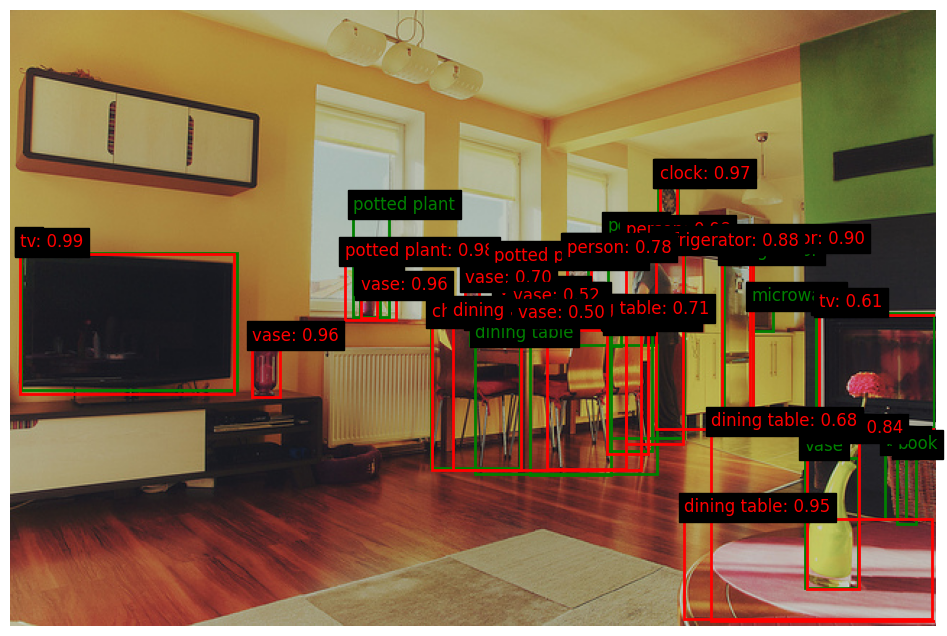

In [52]:
# Assuming the first few images have good predictions
idx = 0  # You can change this index
img_pil, target, prediction = get_image_and_prediction(idx)

# Plot the image with ground truth and predicted boxes
plot_image_with_boxes(img_pil, targets=target, predictions=prediction, score_threshold=0.5)

In [57]:
from torchvision.ops import box_iou

def plot_detailed_predictions(img, target, prediction, iou_threshold=0.5):
    if isinstance(img, torch.Tensor):
        img = img.permute(1, 2, 0).cpu().numpy()

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

    # Plot ground truth boxes
    gt_boxes = []
    for ann in target:
        bbox = ann['bbox']
        category_id = ann['category_id']
        category_name = coco_gt.loadCats(category_id)[0]['name']
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='green', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            bbox[0], bbox[1] - 5, category_name,
            color='green', fontsize=12, backgroundcolor='black'
        )
        gt_boxes.append([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]])
    gt_boxes = torch.tensor(gt_boxes)

    # Predictions
    pred_boxes = prediction['boxes'].cpu()
    pred_scores = prediction['scores'].cpu()
    pred_labels = prediction['labels'].cpu()

    # Compute IoU
    ious = box_iou(pred_boxes, gt_boxes)

    # For each predicted box, find the best matching ground truth box
    iou_max, gt_indices = ious.max(dim=1)

    for idx, (bbox, score, label) in enumerate(zip(pred_boxes, pred_scores, pred_labels)):
        if score < 0.5:
            continue
        bbox = bbox.numpy()
        category_name = coco_gt.loadCats(int(label))[0]['name']
        if iou_max[idx] >= iou_threshold:
            edgecolor = 'blue'  # True positive
        else:
            edgecolor = 'red'  # False positive

        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
            linewidth=2, edgecolor=edgecolor, facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            bbox[0], bbox[1] - 5, f'{category_name}: {score:.2f}',
            color=edgecolor, fontsize=12, backgroundcolor='black'
        )

    plt.axis('off')
    plt.show()


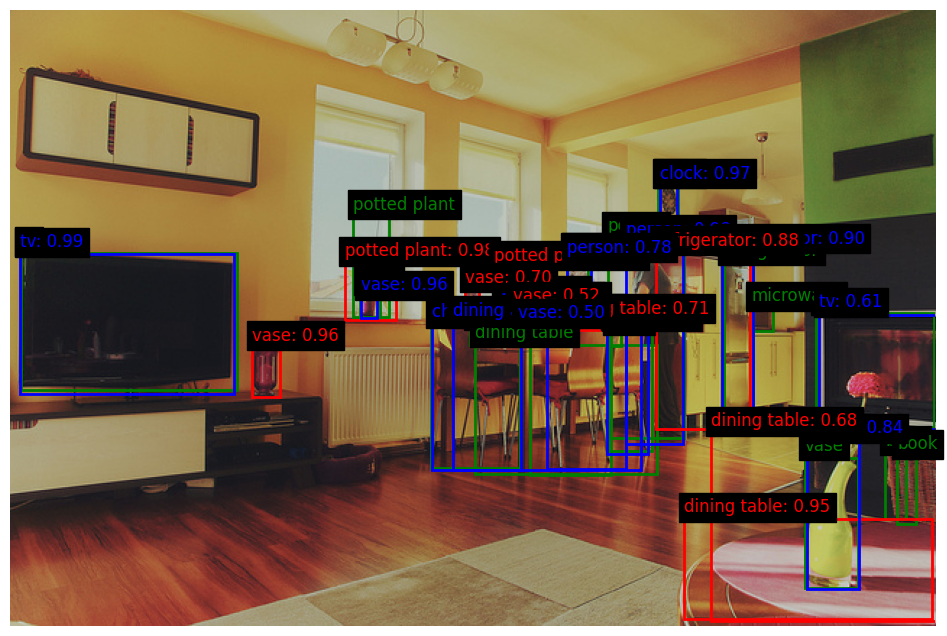

In [61]:
plot_detailed_predictions(img_pil, target=target, prediction=prediction, iou_threshold=0.5)